# Text Analysis and Visualization
The aim of the notebook is present results of quantitative analysis of text data. We select a Czech text, split it into tokens, perform frequency analysis, and observe the nature of the data.

We present several different visualizations using the module `matplotlib` and visualization directly from `pandas`.

In [1]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np

[nltk_data] Downloading package punkt to /home/zuzana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
text = None
with open('../resources/maj.txt') as f:  # modify the path if needed
    text = f.read()

In [3]:
import requests
import json

In [5]:
data = {"call": "tagger", 
        "lang": "cs",
        "output": "json",
        "text": text.replace(';', ',')
       }
uri = "https://nlp.fi.muni.cz/languageservices/service.py"
r = requests.post(uri, data=data)
r

<Response [200]>

In [6]:
if r.status_code!=200:
    print(r.content)

In [7]:
data = r.json()

{'vertical': [['<s>'],
  ['1', '#num#', 'k4'],
  ['Byl', 'být', 'k5eAaImAgInS'],
  ['pozdní', 'pozdní', 'k2eAgInSc1d1'],
  ['večer', 'večer', 'k1gInSc1'],
  ['–', '–', 'k?'],
  ['první', 'první', 'k4xOgInSc4'],
  ['máj', 'máj', 'k1gInSc1'],
  ['–', '–', 'k?'],
  ['večerní', 'večerní', 'k2eAgInSc4d1'],
  ['máj', 'máj', 'k1gFnSc1'],
  ['–', '–', 'k?'],
  ['byl', 'být', 'k5eAaImAgInS'],
  ['lásky', 'láska', 'k1gFnSc2'],
  ['čas', 'čas', 'k1gInSc1'],
  ['<g/>'],
  ['.', '.', 'kIx.'],
  ['</s>'],
  ['<s desamb="1">'],
  ['Hrdliččin', 'hrdliččin', 'k2eAgInSc1d1'],
  ['zval', 'zvát', 'k5eAaImAgInS'],
  ['ku', 'k', 'k7c3'],
  ['lásce', 'láska', 'k1gFnSc3'],
  ['hlas', 'hlas', 'k1gInSc1'],
  ['<g/>'],
  [',', ',', 'kIx,'],
  ['kde', 'kde', 'k6eAd1'],
  ['borový', 'borový', 'k2eAgMnSc1d1'],
  ['zaváněl', 'zavánět', 'k5eAaImAgInS'],
  ['háj', 'háj', 'k1gInSc1'],
  ['<g/>'],
  ['.', '.', 'kIx.'],
  ['</s>'],
  ['<s desamb="1">'],
  ['O', 'o', 'k7c6'],
  ['lásce', 'láska', 'k1gFnSc6'],
  ['šeptal',

In [8]:
tokens = [token for token in data['vertical'] if len(token)==3]
df = pd.DataFrame.from_dict({"word": [word for word, lemma, tag in tokens], 
                              "lemma": [lemma for word, lemma, tag in tokens], 
                              "tag": [tag for word, lemma, tag in tokens]
                               })
pd.options.display.max_rows = len(df)
df

word          lemma                                     tag
0                 1          #num#                                      k4
1               Byl            být                            k5eAaImAgInS
2            pozdní         pozdní                            k2eAgInSc1d1
3             večer          večer                                k1gInSc1
4                 –              –                                      k?
5             první          první                              k4xOgInSc4
6               máj            máj                                k1gInSc1
7                 –              –                                      k?
8           večerní        večerní                            k2eAgInSc4d1
9               máj            máj                                k1gFnSc1
10                –              –                                      k?
11              byl            být                            k5eAaImAgInS
12            lásky          láska                                k1gFnSc2
13              čas            čas                                k1gInSc1
14                .              .                                    kIx.
15        Hrdliččin      hrdliččin                            k2eAgInSc1d1
16             zval           zvát                            k5eAaImAgInS
17               ku              k                                    k7c3
18            lásce          láska                                k1gFnSc3
19             hlas           hlas                                k1gInSc1
20                ,              ,                                    kIx,
21              kde            kde                                  k6eAd1
22           borový         borový                            k2eAgMnSc1d1
23          zaváněl        zavánět                            k5eAaImAgInS
24              háj            háj                                k1gInSc1
25                .              .                                    kIx.
26                O              o                                    k7c6
27            lásce          láska                                k1gFnSc6
28           šeptal         šeptat                            k5eAaImAgInS
29            tichý          tichý                            k2eAgInSc1d1
30             mech           mech                                k1gInSc1
31                ,              ,                                    kIx,
32         květoucí       květoucí                            k2eAgInSc1d1
33            strom          strom                                k1gInSc1
34             lhal           lhát                            k5eAaImAgInS
35            lásky          láska                                k1gFnPc4
36              žel            žel                                      k9
37                ,              ,                                    kIx,
38             svou           svůj                            k3xOyFgFnSc4
39            lásku          láska                                k1gFnSc4
40           slavík         slavík                                k1gMnSc1
41             růži           růže                                k1gFnSc4
42              pěl            pět                            k5eAaImAgMnS
43                ,              ,                                    kIx,
44           růžinu         růžina                                k1gFnSc4
45            jevil          jevit                            k5eAaImAgInS
46            vonný          vonný                            k2eAgInSc1d1
47           vzdech         vzdech                                k1gInSc1
48                .              .                                    kIx.
49           Jezero         jezero                                k1gNnSc1
50           hladké         hladký                            k2eAgNnSc1d1
51                v              v                                    k7c6
52          křovích          křoev      

In [9]:
pos = [tag[0:2] for tag in df["tag"]]
df["pos"] = pos
df

word          lemma                                     tag pos
0                 1          #num#                                      k4  k4
1               Byl            být                            k5eAaImAgInS  k5
2            pozdní         pozdní                            k2eAgInSc1d1  k2
3             večer          večer                                k1gInSc1  k1
4                 –              –                                      k?  k?
5             první          první                              k4xOgInSc4  k4
6               máj            máj                                k1gInSc1  k1
7                 –              –                                      k?  k?
8           večerní        večerní                            k2eAgInSc4d1  k2
9               máj            máj                                k1gFnSc1  k1
10                –              –                                      k?  k?
11              byl            být                            k5eAaImAgInS  k5
12            lásky          láska                                k1gFnSc2  k1
13              čas            čas                                k1gInSc1  k1
14                .              .                                    kIx.  kI
15        Hrdliččin      hrdliččin                            k2eAgInSc1d1  k2
16             zval           zvát                            k5eAaImAgInS  k5
17               ku              k                                    k7c3  k7
18            lásce          láska                                k1gFnSc3  k1
19             hlas           hlas                                k1gInSc1  k1
20                ,              ,                                    kIx,  kI
21              kde            kde                                  k6eAd1  k6
22           borový         borový                            k2eAgMnSc1d1  k2
23          zaváněl        zavánět                            k5eAaImAgInS  k5
24              háj            háj                                k1gInSc1  k1
25                .              .                                    kIx.  kI
26                O              o                                    k7c6  k7
27            lásce          láska                                k1gFnSc6  k1
28           šeptal         šeptat                            k5eAaImAgInS  k5
29            tichý          tichý                            k2eAgInSc1d1  k2
30             mech           mech                                k1gInSc1  k1
31                ,              ,                                    kIx,  kI
32         květoucí       květoucí                            k2eAgInSc1d1  k2
33            strom          strom                                k1gInSc1  k1
34             lhal           lhát                            k5eAaImAgInS  k5
35            lásky          láska                                k1gFnPc4  k1
36              žel            žel                                      k9  k9
37                ,              ,                                    kIx,  kI
38             svou           svůj                            k3xOyFgFnSc4  k3
39            lásku          láska                                k1gFnSc4  k1
40           slavík         slavík                                k1gMnSc1  k1
41             růži           růže                                k1gFnSc4  k1
42              pěl            pět                            k5eAaImAgMnS  k5
43                ,              ,                                    kIx,  kI
44           růžinu         růžina                                k1gFnSc4  k1
45            jevil          jevit                            k5eAaImAgInS  k5
46            vonný          vonný                            k2eAgInSc1d1  k2
47           vzdech         vzdech                                k1gInSc1  k1
48                .              .                                    kIx.  kI
49           Jezero         jezero                               

In [10]:
nouns = df[df["pos"]=="k1"]
verbs = df[df["pos"]=="k5"]
cn = nouns.groupby(by="lemma").count()
noun_lemmata = pd.DataFrame({"count":cn["word"]})
vn = verbs.groupby(by="lemma").count()
verb_lemmata = pd.DataFrame({"count":vn["word"]})

noun_lemmata.sort_values("count", ascending=False)

count
lemma               
hora              34
čas               31
hlas              31
jezero            29
kolo              28
vězeň             27
láska             25
noc               23
tvář              22
den               20
stín              19
voda              17
zrak              17
les               17
slza              16
máj               16
sen               16
myšlenka          14
břeh              14
klín              14
dálka             13
zář               13
pahorek           12
lebka             12
měsíc             11
vítr              11
hluk              11
skála             11
zem               11
hvězda            11
lůno              10
sbor              10
mrak              10
nebe              10
hrob               9
srdce              9
ticho              9
město              9
pán                9
oko                8
dol                8
můj                8
krajina            8
zločinec           8
věk                8
konec              8
svět               8
slunce             7
cit                7
vůdce              7
Jarmila            7
Vilém              7
kraj               7
běh                7
kapka              7
hlava              7
duch               7
jiskra             7
zpěv               6
dívka              6
květ               6
země               6
sloup              6
blíž               6
vlna               6
strom              6
stán               6
krok               6
hrůza              6
zvuk               6
světlo             6
život              6
modro              6
léto               6
pták               5
půlnoc             5
ilustrace          5
temno              5
moc                5
vina               5
kůl                5
slovo              5
množství           5
ucho               5
večer              5
brána              5
otec               5
dvůr               5
ruka               5
svůdce             4
háj                4
hřmot              4
svit               4
síň                4
krev               4
věž                4
mlha               4
vichr              4
požár              4
růže               4
hloub              4
zvon               4
mal                4
strážce            4
strážný            4
pláč               4
plášť              4
pohřeb             4
pád                4
dub                4
lampa              4
šepot              4
řetěz              4
mračno             4
stůl               4
matka              4
příkrov            4
kůň                4
oud                4
svita              4
milenka            4
krása              3
rosa               3
lid                3
vzdech             3
střed              3
věnec              3
vlnka              3
meč                3
líc                3
věčnost            3
lílie              3
vrch               3
svůj               3
kostlivec          3
duše               3
tvůj               3
zástup             3
cíl                3
rok                3
chvíle             3
tvor               3
plavec             3
pluk               3
trouba             3
bílé               3
byt                3
pola               3
tma                3
bor                3
šepce              3
pouť               3
sova               3
žal                3
pruh               3
tíš                3
smutek             3
hra                3
rakev              3
kaple              3
jméno              3
kletba             3
hluboko            3
kobka              3
skok               3
obraz              3
hudba              3
kmit               3
jasno              3
poutník            2
mrákota            2
roucho             2
muka               2
ptactvo            2
neskončenost       2
syn                2
mrtvý              2
nebesa             2
pot                2
péro               2
muška              2
temnota            2
tón                2
pole               2
rameno             2
obličej            2
půlnoční           2
místo              2
oheň               2
okno

In [11]:
verb_lemmata.sort_values("count", ascending=False)

count
lemma              
být              65
stát             16
mít              11
dát               9
zhynout           9
hynout            8
kolit             8
jít               7
zvát              7
hrát              7
umírat            7
znít              6
plynout           6
vinout            5
míhat             5
sedět             5
zdvíhat           5
spát              4
umlknout          4
splynout          4
vést              4
spěchat           4
stíhat            4
svítit            4
připravit         4
objímat           4
vstát             4
měřit             4
opírat            3
zdát              3
obdržet           3
zjevit            3
zvučet            3
zírat             3
zřít              3
přijít            3
změnit            3
vědět             3
přikrýt           3
sklesnout         3
svít              3
zalétat           3
zajít             3
utichnout         3
zahalit           3
vyvést            3
vzbudit           3
vzejít            3
vábit             3
kráčet            3
žít               3
klonit            3
bloudit           3
dřímat            3
hledět            3
jestitit          3
jevit             3
hořet             2
přikrývat         2
dít               2
dívat             2
uhlídat           2
táhnout           2
tvořit            2
taktit            2
pět               2
střídat           2
stopit            2
překonávat        2
hlubokotit        2
přelétat          2
spočívat          2
smát              2
upírat            2
skvět             2
skončit           2
růst              2
rozestírat        2
rojit             2
přivanout         2
houpat            2
přimrazit         2
slyšet            2
usnout            2
prosvítat         2
uvést             2
šeptat            2
šepotat           2
řinčet            2
činit             2
zívat             2
blysknout         2
blížit            2
znět              2
broubit           2
budit             2
zmizet            2
bít               2
zhlížet           2
běžet             2
zavánět           2
zavraždit         2
zakvítat          2
zajmout           2
zabírat           2
vzplanout         2
vyvstat           2
vyhasnout         2
vycházet          2
vstoupit          2
vrátit            2
vlastit           2
vidět             2
psát              2
barvit            2
odpravit          2
letět             2
nastat            2
plát              2
padat             2
omdlívat          2
minout            2
opět              2
pohynout          2
lkánět            2
lhát              2
ležet             2
mísit             2
jíst              2
obrátit           2
nést              2
klesnout          2
obnažit           2
nastávat          2
vstoupat          1
dostihnout        1
vzdát             1
vzplát            1
jímat             1
dosáhnout         1
nalézt            1
najít             1
vyhnat            1
vyjít             1
vzdechnout        1
vyniknout         1
doslechnout       1
vzdálit           1
vzmahat           1
vystoupit         1
mřít              1
doručit           1
vyvábit           1
vyrýt             1
pokleknout        1
vrýt              1
vdechnout         1
uspat             1
uspávat           1
ustoupit          1
dozvědět          1
utírat            1
uvadnout          1
uvádět            1
ničit             1
uvít              1
uzřít             1
valit             1
vedšit            1
vplést            1
veselit           1
nechat            1
dovést            1
nazývat           1
vloudit           1
vložit            1
vlát              1
vodit             1
doprovázet        1
volat             1
volit             1
vzít              1
věžit             1
vát               1
dopadnout         1
chtít             1
mlčet             1
zdít              1
zemřít            1
zhasnout          1
mluvit            1
bydlit            1
zkalit            1
mihnout           1
zmlknout          1
lít               1
znát              1
líbat             1
ztichnout     

In [12]:
person1 = df[df["tag"].str.contains("p1")]
person1

word     lemma                            tag pos
652         mi        já                     k3xPp1nSc3  k3
674        můj       můj                   k3xOp1gMnSc1  k3
809        mou       můj                   k3xOp1gFnSc4  k3
1094       mou       můj                   k3xOp1gFnSc4  k3
1100        mě        já                     k3xPp1nSc4  k3
1108        mě        já                     k3xPp1nSc4  k3
1117       mně        já                     k3xPp1nSc6  k3
1128        já        já                     k3xPp1nSc1  k3
1130      jsem       být                   k5eAaImIp1nS  k5
1138       můj       můj                   k3xOp1gInSc4  k3
1381       můj       můj                   k3xOp1gInSc1  k3
1391      mojí       můj                   k3xOp1gFnSc2  k3
1395       mně        já                     k3xPp1nSc6  k3
1410      jsem       být                   k5eAaImIp1nS  k5
1424      nesu      nést                   k5eAaImIp1nS  k5
1435      jsem       být                   k5eAaImIp1nS  k5
1436        já        já                     k3xPp1nSc1  k3
1441      bych        by                       kYmCp1nS  kY
1448      jsem       být                   k5eAaImIp1nS  k5
1460      hynu    hynout                   k5eAaImIp1nS  k5
1512      jsem       být                   k5eAaImIp1nS  k5
1518       můj       můj                   k3xOp1gMnSc1  k3
1525        Má       můj                   k3xOp1gFnSc1  k3
1616       můj       můj                   k3xOp1gInSc1  k3
1741        mé       můj                   k3xOp1gFnSc2  k3
1819      žiji       žít                   k5eAaImIp1nS  k5
1837      jsem       být                   k5eAaImIp1nS  k5
1847        mi        já                     k3xPp1nSc3  k3
1929       mně        já                     k3xPp1nSc6  k3
2001       mně        já                     k3xPp1nSc6  k3
2116       mne        já                     k3xPp1nSc4  k3
2125      mnou        já                     k3xPp1nSc7  k3
2129       mne        já                     k3xPp1nSc2  k3
2132      mnou        já                     k3xPp1nSc7  k3
2183      jsem       být                   k5eAaImIp1nS  k5
2374     ničím     ničit                   k5eAaImIp1nS  k5
2790       nás        my                     k3xPp1nPc4  k3
2816      námi        my                     k3xPp1nPc7  k3
2819       nám        my                     k3xPp1nPc3  k3
2859       můj       můj                   k3xOp1gInSc4  k3
2864       Můj       můj                   k3xOp1gInSc1  k3
2884       nás        my                     k3xPp1nPc4  k3
2910       nás        my                     k3xPp1nPc4  k3
2928       můj       můj                   k3xOp1gInSc1  k3
2943        mi        já                     k3xPp1nSc3  k3
2953      budu       být                   k5eAaImBp1nS  k5
2954        já        já                     k3xPp1nSc1  k3
2961        My        my                     k3xPp1nPc1  k3
2962   odbudem     odbýt                 k5eAaPmIp1nPwH  k5
2981        Já        já                     k3xPp1nSc1  k3
2985       dám       dát                   k5eAaPmIp1nS  k5
2992        Já        já                     k3xPp1nSc1  k3
2994  obstarám  obstarat                   k5eAaPmIp1nS  k5
2999        Já        já                     k3xPp1nSc1  k3
3002   doručím   doručit                   k5eAaPmIp1nS  k5
3014       nám        my                     k3xPp1nPc3  k3
3021        já        já                     k3xPp1nSc1  k3
3024  zapůjčím  zapůjčit                   k5eAaPmIp1nS  k5
3030        já        já                     k3xPp1nSc1  k3
3031   rozduji   rozdout                   k5eAaPmIp1nS  k5
3039        Já        já                     k3xPp1nSc1  k3
3042  pokropím  pokropit                   k5eAaPmIp1nS  k5
3048        Já        já                     k3xPp1nSc1  k3
3052     uviji      uvít                   k5eAaPmIp1nS  k5
3058        My        my                     k3xPp1nPc1  k3
3062   donesem    donést                 k5eAaPmIp

**TASK 1** Observe the variable `noun_lemmata`, `verb_lemmata`, `person1`. What type they are (hint: use function `type(...)`). How were they calculated?

# Visualizations
Using the annotations, we can easily visualize the grammar characteristics in the poem.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

In the first set of visualizations, we can see that in the middle of the poem, first person is used significantly more frequently than in the rest of the text.

<AxesSubplot:>

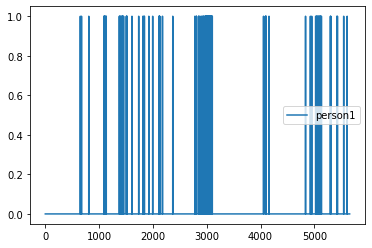

In [13]:
vis = pd.DataFrame({'word':df['word'], 'person1':[1 if i in person1.index else 0 for i in range(len(df))]})
vis
vis.plot()

<AxesSubplot:>

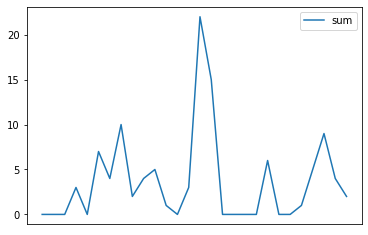

In [14]:
group = 200
bins = pd.cut(df.index, int(len(df)/group))
vis = pd.DataFrame({'lemma':df['lemma'], 'person1':[1 if i in person1.index else 0 for i in range(len(df))]})
vis = vis.groupby(bins)['person1'].agg(['sum'])
vis
vis.plot(xticks=([]))

Second, we prepared two lists of words: one with positive sentiment, one with negative sentiment. Check how the sentiment changes in the poem.

*negative sentiment*: vězeň (prisoner), smrt (death), hrob (grave), hrůza (terror), kletba (curse), kostlivec (skeleton), krev (blood)

*positive sentiment*: láska (love), anjel (angel), dívka (girl), máj (May), lučina (meadow), mladost (youth), příroda (nature)

Note that for drawing lines instead of points, we need to group our data into *bins*. Visualization only helps where the amount of displayed data is reasonable.

<AxesSubplot:>

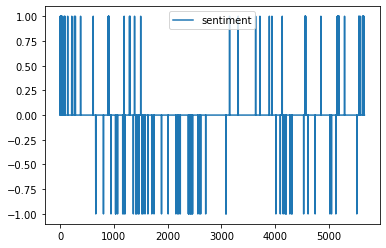

In [15]:
sentiment_negative = df[(df["lemma"].str.contains("vězeň"))|(df["lemma"].str.contains("smrt"))|(df["lemma"].str.contains("hrob"))|(df["lemma"].str.contains("hrůza"))|(df["lemma"].str.contains("kletba"))|(df["lemma"].str.contains("kostlivec"))|(df["lemma"].str.contains("krev"))]
sentiment_positive = df[(df["lemma"].str.contains("láska"))|(df["lemma"].str.contains("anjel"))|(df["lemma"].str.contains("dívka"))|(df["lemma"].str.contains("máj"))|(df["lemma"].str.contains("lučina"))|(df["lemma"].str.contains("mladost"))|(df["lemma"].str.contains("příroda"))]
vis = pd.DataFrame({'word':df['word'], 'sentiment':[-1 if i in sentiment_negative.index else (1 if i in sentiment_positive.index else 0) for i in range(len(df))]})
vis.plot()

<AxesSubplot:>

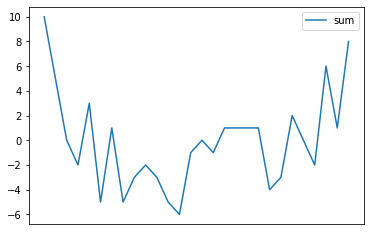

In [16]:
group = 200
bins = pd.cut(df.index, int(len(df)/group))
vis = pd.DataFrame({'lemma':df['lemma'], 'sentiment':[-1 if i in sentiment_negative.index else (1 if i in sentiment_positive.index else 0) for i in range(len(df))]})
vis = vis.groupby(bins)['sentiment'].agg(['sum'])
vis
vis.plot(xticks=([]))

## Part-of-speech
Visualization of number of different part-of-speech. Observe a change in the end of the poem.

<AxesSubplot:>

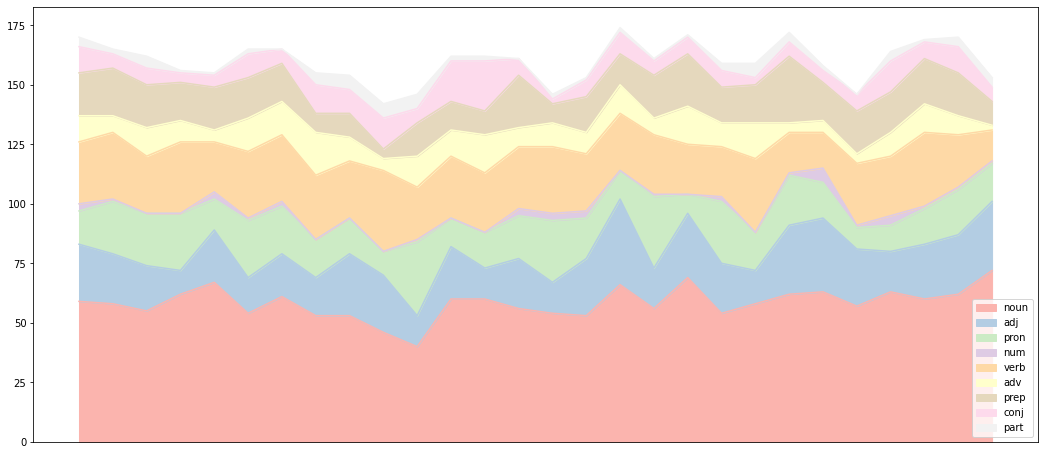

In [15]:
group = 200
bins = pd.cut(df.index, int(len(df)/group))
k1 = df[(df["tag"].str.contains("k1"))]
k2 = df[(df["tag"].str.contains("k2"))]
k3 = df[(df["tag"].str.contains("k3"))]
k4 = df[(df["tag"].str.contains("k4"))]
k5 = df[(df["tag"].str.contains("k5"))]
k6 = df[(df["tag"].str.contains("k6"))]
k7 = df[(df["tag"].str.contains("k7"))]
k8 = df[(df["tag"].str.contains("k8"))]
k9 = df[(df["tag"].str.contains("k9"))]
vis = pd.DataFrame({'lemma':df['lemma'], 
                    'noun':[1 if i in k1.index else 0 for i in range(len(df))],
                    'adj':[1 if i in k2.index else 0 for i in range(len(df))],
                    'pron':[1 if i in k3.index else 0 for i in range(len(df))],
                    'num':[1 if i in k4.index else 0 for i in range(len(df))],
                    'verb':[1 if i in k5.index else 0 for i in range(len(df))],
                    'adv':[1 if i in k6.index else 0 for i in range(len(df))],
                    'prep':[1 if i in k7.index else 0 for i in range(len(df))],
                    'conj':[1 if i in k8.index else 0 for i in range(len(df))],
                    'part':[1 if i in k9.index else 0 for i in range(len(df))]})
vis = vis.groupby(bins).agg(['sum'])
vis.columns = vis.columns.get_level_values(0)
vis
vis.plot.area(figsize=(18,8),xticks=([]),cmap='Pastel1')

## Length of words
Let's check whether the length of the words (which influences rhythm) changes in different parts of the poem.

In [16]:
vis = pd.DataFrame({'length': [len(df.iloc[i]['word']) for i in range(len(df))]})
vis

length
0          1
1          3
2          6
3          5
4          1
5          5
6          3
7          1
8          7
9          3
10         1
11         3
12         5
13         3
14         1
15         9
16         4
17         2
18         5
19         4
20         1
21         3
22         6
23         7
24         3
25         1
26         1
27         5
28         6
29         5
30         4
31         1
32         8
33         5
34         4
35         5
36         3
37         1
38         4
39         5
40         6
41         4
42         3
43         1
44         6
45         5
46         5
47         6
48         1
49         6
50         6
51         1
52         7
53         8
54         7
55         5
56         5
57         3
58         1
59         4
60         2
61         7
62         3
63         1
64         3
65         1
66         1
67         6
68         5
69         5
70         6
71         8
72        11
73         5
74         1
75         8
76         3
77         2
78         4
79         5
80         1
81         1
82         5
83         4
84         1
85         6
86         7
87         2
88         2
89         5
90         5
91         5
92         6
93         1
94         2
95         2
96         1
97         7
98         1
99         4
100        6
101        8
102        2
103        1
104        6
105        8
106        1
107        8
108        2
109        7
110        5
111        1
112        6
113        4
114        6
115        4
116        1
117        3
118        5
119        5
120        1
121        5
122        5
123        1
124        3
125        7
126        7
127        5
128        1
129        2
130        7
131        9
132        3
133        1
134        2
135        6
136        6
137        3
138        5
139        1
140        4
141        1
142        4
143        6
144        5
145        1
146        3
147        7
148        5
149        5
150        4
151        1
152        4
153        1
154        4
155        3
156        4
157        4
158        1
159        4
160        1
161        3
162        1
163        6
164        2
165        3
166        1
167        3
168        2
169        6
170        1
171        8
172        4
173        1
174        2
175        7
176        5
177        1
178        5
179        7
180        1
181        1
182        4
183        2
184        6
185        1
186        7
187        5
188        1
189        1
190        7
191        5
192        4
193        3
194        1
195        3
196        5
197        1
198        4
199        1
200        1
201        5
202        3
203        2
204        5
205        1
206        4
207        2
208        5
209        7
210        6
211        1
212        3
213        5
214        1
215        1
216        3
217        5
218        1
219        6
220        5
221        4
222        1
223        2
224        8
225        6
226        3
227        5
228        6
229        4
230        4
231        1
232        2
233        5
234        1
235        5
236        6
237        6
238        4
239        6
240        5
241        1
242        2
243        2
244        2
245        5
246        1
247        6
248        4
249        1
250        4
251        6
252        7
253        1
254        4
255        8
256        8
257        1
258        2
259        1
260        5
261        1
262        5
263        5
264        6
265        1
266        2
267        8
268        7
269        7
270        5
271        4
272        5
273        1
274        2
275        8
276        7
277        3
278        4
279        6
280        5
281        6
282        1
283        7
284        6
285        1
286        5
287        5
288        1
289        2
290        7
291        2
292        4
293        6
294        1
295        1
296        9
297        6
298        5
299        5
300        1
301        6
302        4
303        2
304        6
305        5
306        1
30

<AxesSubplot:>

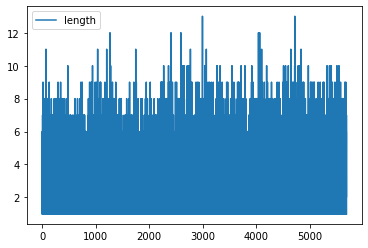

In [17]:
vis.plot()

<AxesSubplot:>

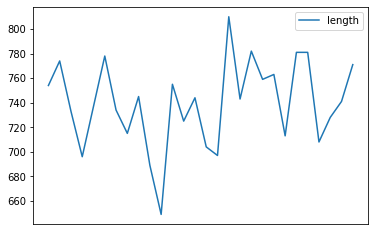

In [18]:
group = 200
bins = pd.cut(df.index, int(len(df)/group))
vis = pd.DataFrame({'length': [len(df.iloc[i]['lemma']) for i in range(len(df))]})
vis = vis.groupby(bins).agg(['sum'])
vis.columns = vis.columns.get_level_values(0)
vis
vis.plot(xticks=([]))

### Histogram
See how many words there are in each length category. Since the poem is yambic (quite rare in Czech), there are many short words. On the other hand, there are also quite long words, let's list the longest words as well.

<AxesSubplot:ylabel='Frequency'>

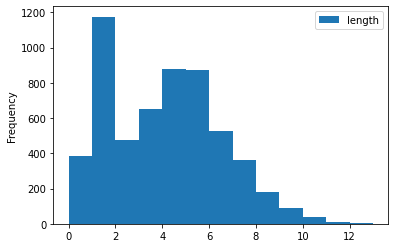

In [22]:
vis = pd.DataFrame({'word':df.word, 'length': [len(df.iloc[i]['word']) if df.iloc[i]['tag']!='k?' else 0 for i in range(len(df))]})
vis.plot.hist(bins=13)

In [23]:
count, division = np.histogram(vis.length, bins=13)
count, division

(array([ 384, 1175,  477,  654,  880,  873,  528,  364,  180,   91,   36,
           9,    7]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13.]))

In [24]:
vis[vis.length==13]

word  length
2983  truchloroušky      13
4695  rozesmutnivši      13